In [22]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.usetex'] = True

import seaborn as sns

In [2]:
palette = sns.color_palette('viridis', n_colors=8)
palette

[(0.281412, 0.155834, 0.469201),
 (0.244972, 0.287675, 0.53726),
 (0.190631, 0.407061, 0.556089),
 (0.147607, 0.511733, 0.557049),
 (0.119699, 0.61849, 0.536347),
 (0.20803, 0.718701, 0.472873),
 (0.430983, 0.808473, 0.346476),
 (0.709898, 0.868751, 0.169257)]

# Lotka-Volterra equations

\begin{align}
\dot X_1 &= a_1 X_1 - a_2 X_1 X_2 \\
\dot X_2 &= a_3 X_1 X_2 - a_4 X_2 - a_5 X_2 X_3 \\
\dot X_3 &= a_6 X_2 X_3 - a_7 X_3 \\
\end{align}

In [3]:
def modelLV(Y, t, a1, a2, a3, a4, a5, a6, a7):
    X1, X2, X3 = Y
    
    dX1 = a1*X1 - a2*X1*X2
    dX2 = a3*X1*X2 - a4*X2 - a5*X2*X3
    dX3 = a6*X2*X3 - a7*X3
    
    return [dX1, dX2, dX3]

In [4]:
a1 = 0.14 # Reproduction rate of X1
a2 = 0.16 # Rate of predation of X2 on X1
a3 = 0.15 # Reproduction rate of X2 in presence of X1
a4 = 0.11 # Mortality rate of X1
a5 = 0.05 # Rate of predation of X3 on X2
a6 = 0.06 # Reproduction rate of X3 in presence of X1
a7 = 0.05 # Mortality rate of X3

In [5]:
X1_0 = 4
X2_0 = 2
X3_0 = 1
Y0 = [X1_0, X2_0, X3_0]

In [6]:
t = np.linspace(0, 80, 161)

In [7]:
sol = odeint(modelLV, Y0, t, args=(a1, a2, a3, a4, a5, a6, a7))

In [8]:
X1 = sol[:,0]
X2 = sol[:,1]
X3 = sol[:,2]

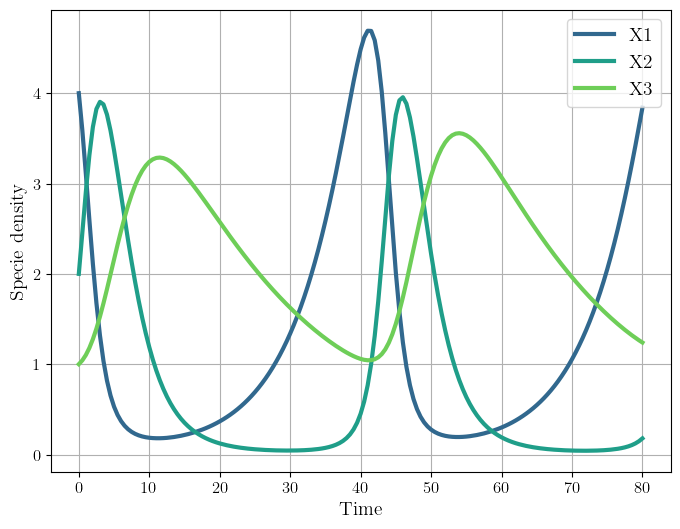

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8,6), facecolor='white')

axs.plot(t, X1, lw=3, color=palette[2], label='X1')
axs.plot(t, X2, lw=3, color=palette[4], label='X2')
axs.plot(t, X3, lw=3, color=palette[6], label='X3')
axs.legend(loc='best')
axs.set_xlabel('Time')
axs.set_ylabel('Specie density')
axs.grid()

plt.show()

In [10]:
np.savetxt('LVdata.data', np.transpose([t[0::5],X1[0::5],X2[0::5],X3[0::5]]),
           delimiter=' ', fmt='%.2f', header='Time X1 X2 X3')

## Recovering parameters

In [11]:
dfData = pd.read_csv('LVdata.data', sep=' ', skiprows=1, names=['Time', 'X1', 'X2', 'X3'])

In [12]:
names=['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7']

In [13]:
dfParams = pd.read_csv('multDEpars.dat', sep='\t', names=names)

In [14]:
X1_0 = 4
X2_0 = 2
X3_0 = 1
Y0 = [X1_0, X2_0, X3_0]

In [15]:
t = np.linspace(0, 80, 161)

In [16]:
X1 = []
X2 = []
X3 = []

In [17]:
for i in range(dfParams.shape[0]):
    a1 = dfParams['a1'][i]
    a2 = dfParams['a2'][i]
    a3 = dfParams['a3'][i]
    a4 = dfParams['a4'][i]
    a5 = dfParams['a5'][i]
    a6 = dfParams['a6'][i]
    a7 = dfParams['a7'][i]

    sol = odeint(modelLV, Y0, t, args=(a1, a2, a3, a4, a5, a6, a7))
    X1.append(sol[:,0])
    X2.append(sol[:,1])
    X3.append(sol[:,2])

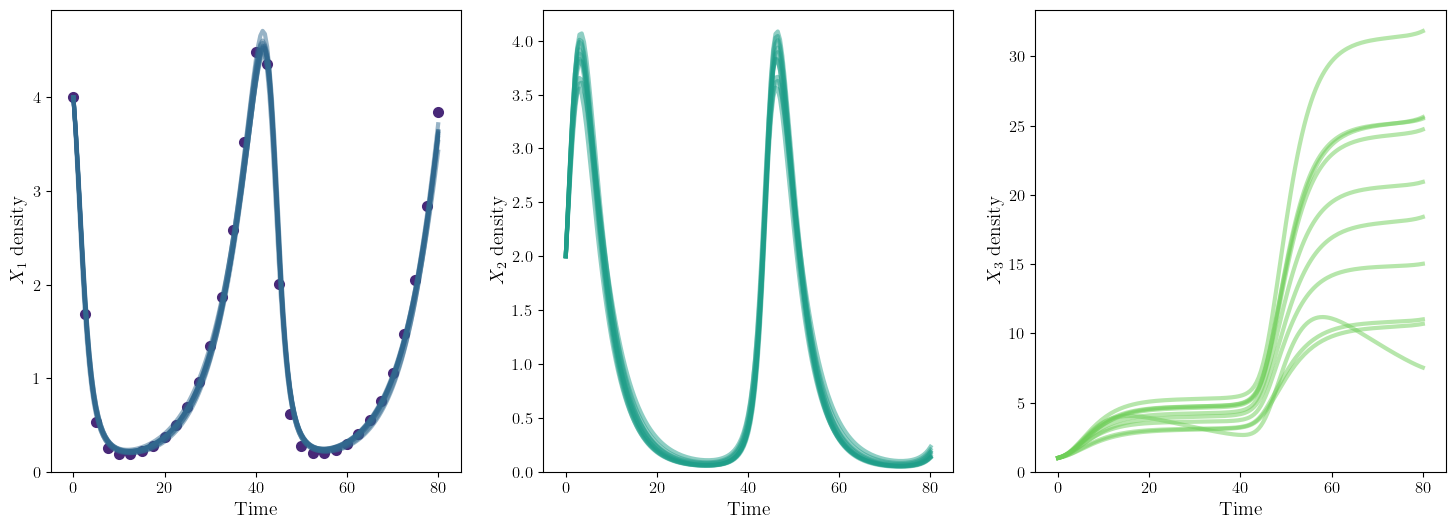

In [18]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18,6), facecolor='white')

for i in range(dfParams.shape[0]):
    axs[0].plot(t, X1[i], lw=3, color=palette[2], alpha=0.5)
    axs[1].plot(t, X2[i], lw=3, color=palette[4], alpha=0.5)
    axs[2].plot(t, X3[i], lw=3, color=palette[6], alpha=0.5)


axs[0].scatter(x=dfData['Time'], y=dfData['X1'], color=palette[0], lw=2)
axs[0].set_ylabel('$X_1$ density')

axs[1].set_ylim((0))
axs[1].set_ylabel('$X_2$ density')

axs[2].set_ylabel('$X_3$ density')

plt.setp(axs, xlim=(-5,85), xlabel='Time', ylim=(0))

plt.show()

# RMSE landscape

In [48]:
dfRMSEs = pd.read_csv('../pars.dat', sep=' ', skiprows=1, names=['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'RMSE', 'it'])

In [70]:
dfRMSEs['RMSE'].min()

0.09777

In [50]:
dfPars = dfRMSEs.drop(columns=['RMSE', 'it'])
dfPars

,a1,a2,a3,a4,a5,a6,a7
0,0.0010,0.3120,0.80010,0.7118,0.966700,0.60240,0.1140
1,0.8430,0.8301,0.44260,0.1322,0.167400,0.05436,0.6594
2,0.1377,0.4586,0.01086,0.5529,0.612100,0.81600,0.4791
3,0.0010,0.2170,0.70440,0.7651,0.465900,0.69780,0.1838
4,0.2722,0.5731,0.79010,0.1668,0.700500,0.38390,0.9905
...,...,...,...,...,...,...,...
4977,0.1420,0.1474,0.15380,0.2218,0.001000,0.14470,0.5207
4978,0.1364,0.1437,0.16910,0.2402,0.001000,0.08700,0.4216
4979,0.1535,0.1513,0.13640,0.1992,0.006456,0.12150,0.8778
4980,0.1381,0.1483,0.15300,0.2259,0.035800,0.01473,0.9393


In [51]:
dataMat = StandardScaler().fit_transform(dfPars.values) # Normalize
dataPC = PCA(n_components=2).fit_transform(dataMat)

In [52]:
dfPCpars = pd.DataFrame(dataPC, columns = ['PC 1', 'PC 2'])

In [53]:
dfPCpars['RMSE'] = dfRMSEs['RMSE'].values
dfPCpars

,PC 1,PC 2,RMSE
0,2.911674,-0.196309,1.4040
1,0.783533,3.538017,1.8610
2,1.384791,2.531277,85.2900
3,2.021244,-0.462937,1.3580
4,1.983025,1.737685,1.6600
...,...,...,...
4977,-1.567411,0.817842,0.1557
4978,-1.622815,0.606571,0.1606
4979,-1.629708,1.001168,0.1558
4980,-1.701712,0.730248,0.1559


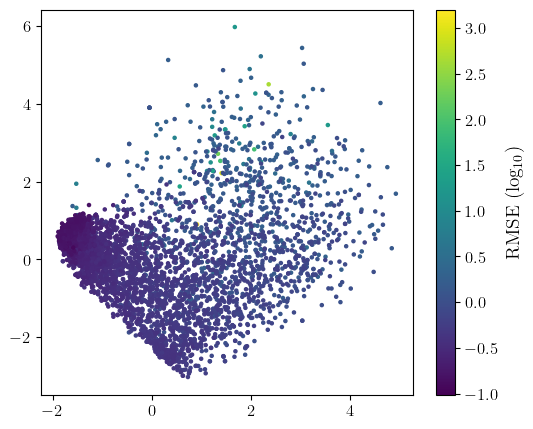

In [74]:
plt.figure(figsize=(6,5))

points = plt.scatter(dfPCpars['PC 1'], dfPCpars['PC 2'], c=np.log10(dfPCpars['RMSE']), s=5, cmap='viridis')
plt.colorbar(points, label='RMSE (log$_{10}$)')

plt.show()